# GARCH
Generalized AutoRegressive Conditional Heteroskedasticity

Model intuition

>Autoregressive: predict future behavior based on past behavior
    
>Volatility as a weighted average of past information

#### Observe volatility clustering

              Close    Return  Return100
Date                                    
2019-09-27  2961.79 -0.531633  -0.531633
2019-09-30  2976.74  0.504762   0.504762
2019-10-01  2940.25 -1.225838  -1.225838
2019-10-02  2887.61 -1.790324  -1.790324
2019-10-03  2910.63  0.797199   0.797199
2019-10-04  2952.01  1.421685   1.421685
2019-10-07  2938.79 -0.447830  -0.447830
2019-10-08  2893.06 -1.556083  -1.556083
2019-10-09  2919.40  0.910455   0.910455
2019-10-10  2938.13  0.641570   0.641570


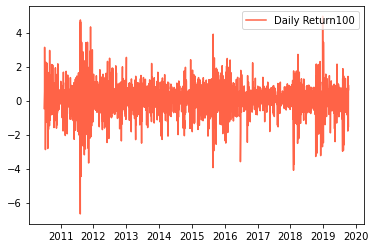

In [8]:
from arch import arch_model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
sp_price=pd.read_csv("sp500.csv")
sp_price['Date'] = pd.to_datetime(sp_price['Date'], format='%Y-%m-%d')
sp_price.set_index(['Date'], inplace = True)

# View the data

sp_price['Return100'] = 100 * (sp_price['Close'].pct_change())

# View the data
print(sp_price.tail(10))

# plot the data
plt.plot(sp_price['Return100'], color = 'tomato', label = 'Daily Return100')
plt.legend(loc='upper right')
plt.show()

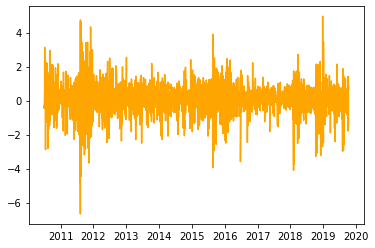

Daily volatility:  0.92%
Monthly volatility:  4.20%
Annual volatility:  14.54%


In [11]:
# Plot the price returns
plt.plot(sp_price['Return'], color = 'orange')
plt.show()

# Calculate daily std of returns
std_daily = sp_price['Return'].std()
print('Daily volatility: ', '{:.2f}%'.format(std_daily))

import math
# Convert daily volatility to monthly volatility
std_monthly = math.sqrt(21) * std_daily
print ('Monthly volatility: ', '{:.2f}%'.format(std_monthly))

# Convert daily volatility to annaul volatility
std_annual = math.sqrt(252) * std_daily
print ('Annual volatility: ', '{:.2f}%'.format(std_annual))

In [18]:
# Specify GARCH model assumptions
basic_gm = arch_model(sp_price['Return'], p = 1, q = 1,
                      mean = 'constant', vol = 'GARCH', dist = 'normal')
# Fit the model
gm_result = basic_gm.fit(update_freq = 4)

Iteration:      4,   Func. Count:     34,   Neg. LLF: 2783.005885607893
Iteration:      8,   Func. Count:     61,   Neg. LLF: 2771.9886612376513
Iteration:     12,   Func. Count:     85,   Neg. LLF: 2771.963828246998
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 2771.9638282462456
            Iterations: 12
            Function evaluations: 85
            Gradient evaluations: 12


Iteration:      4,   Func. Count:     34,   Neg. LLF: 2783.005885607893
Iteration:      8,   Func. Count:     61,   Neg. LLF: 2771.9886612376513
Iteration:     12,   Func. Count:     85,   Neg. LLF: 2771.963828246998
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 2771.9638282462456
            Iterations: 12
            Function evaluations: 85
            Gradient evaluations: 12
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                 Return   R-squared:                      -0.001
Mean Model:             Constant Mean   Adj. R-squared:                 -0.001
Vol Model:                      GARCH   Log-Likelihood:               -2771.96
Distribution:                  Normal   AIC:                           5551.93
Method:            Maximum Likelihood   BIC:                           5574.95
                                        No. Observations:                 2336
Date:              

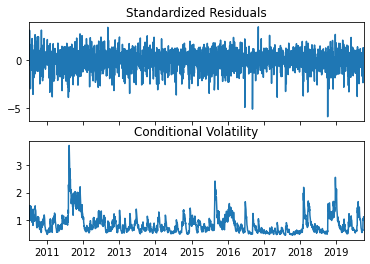

In [19]:
# Specify GARCH model assumptions
basic_gm = arch_model(sp_price['Return'], p = 1, q = 1,
                      mean = 'constant', vol = 'GARCH', dist = 'normal')
# Fit the model
gm_result = basic_gm.fit(update_freq = 4)

# Display model fitting summary
print(gm_result.summary())

# Plot fitted results
gm_result.plot()
plt.show()

## Make forecast with GARCH models

In [76]:
# Make 5-period ahead forecast
gm_forecast = gm_result.forecast(horizon = 5)
print(gm_forecast.mean.iloc[-3:])
print(gm_forecast.residual_variance.iloc[-3:])
# Print the forecast variance
print(gm_forecast.variance.iloc[-3:])


                 h.1       h.2       h.3       h.4       h.5
Date                                                        
2019-10-08  0.111908  0.111908  0.111908  0.111908  0.111908
2019-10-09  0.111908  0.111908  0.111908  0.111908  0.111908
2019-10-10  0.111908  0.111908  0.111908  0.111908  0.111908
                 h.1       h.2       h.3       h.4       h.5
Date                                                        
2019-10-08  1.075015  1.069718  1.065992  1.063372  1.061529
2019-10-09  1.065259  1.062856  1.061166  1.059978  1.059142
2019-10-10  1.054857  1.055540  1.056021  1.056359  1.056597
                 h.1       h.2       h.3       h.4       h.5
Date                                                        
2019-10-08  1.075015  1.069718  1.065992  1.063372  1.061529
2019-10-09  1.065259  1.062856  1.061166  1.059978  1.059142
2019-10-10  1.054857  1.055540  1.056021  1.056359  1.056597
                 h.1      h.2       h.3       h.4       h.5
Date                     

# Distribution assumptions

### Plot distribution of standardized residuals

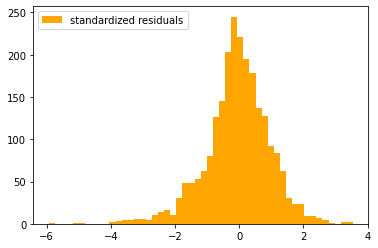

In [22]:
## Obtain model estimated residuals and volatility
gm_resid = gm_result.resid
gm_std = gm_result.conditional_volatility

# Calculate the standardized residuals
gm_std_resid = gm_resid /gm_std

# Plot the histogram of the standardized residuals
plt.hist(gm_std_resid, bins = 50, 
         facecolor = 'orange', label = 'standardized residuals')
#plt.hist(normal_resid, bins = 50, 
        # facecolor = 'tomato', label = 'Normal residuals')
plt.legend(loc = 'upper left')
plt.show()

### Fit a GARCH with skewed t-distribution

Iteration:      1,   Func. Count:      8,   Neg. LLF: 2706.3502661449193
Iteration:      2,   Func. Count:     20,   Neg. LLF: 2703.870194442534
Iteration:      3,   Func. Count:     30,   Neg. LLF: 2702.068170106069
Iteration:      4,   Func. Count:     39,   Neg. LLF: 2693.0518654807206
Iteration:      5,   Func. Count:     50,   Neg. LLF: 2692.9439346726117
Iteration:      6,   Func. Count:     60,   Neg. LLF: 2692.5485687148175
Iteration:      7,   Func. Count:     69,   Neg. LLF: 2691.169079485683
Iteration:      8,   Func. Count:     78,   Neg. LLF: 2690.546981126522
Iteration:      9,   Func. Count:     86,   Neg. LLF: 2690.29796854269
Iteration:     10,   Func. Count:     95,   Neg. LLF: 2690.1540408984156
Iteration:     11,   Func. Count:    104,   Neg. LLF: 2689.993791783949
Iteration:     12,   Func. Count:    112,   Neg. LLF: 2689.990633567082
Iteration:     13,   Func. Count:    120,   Neg. LLF: 2689.981188710427
Iteration:     14,   Func. Count:    128,   Neg. LLF: 2689.9

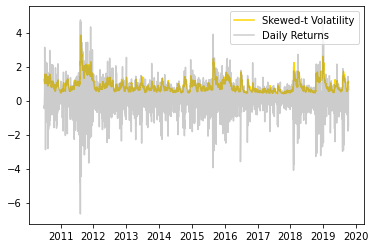

In [26]:
# Specify GARCH model assumptions
skewt_gm = arch_model(sp_price['Return'], p = 1, q = 1, mean = 'constant', vol = 'GARCH', dist = 'skewt')
# Fit the model
skewt_result = skewt_gm.fit()

# Get model estimated volatility
skewt_vol = skewt_result.conditional_volatility

# Plot model fitting results
plt.plot(skewt_vol, color = 'gold', label = 'Skewed-t Volatility')
#plt.plot(normal_vol, color = 'red', label = 'Normal Volatility')
plt.plot(sp_price['Return'], color = 'grey', 
         label = 'Daily Returns', alpha = 0.4)
plt.legend(loc = 'upper right')
plt.show()

# Effect of mean model on volatility predictions

Iteration:      1,   Func. Count:      6,   Neg. LLF: 2788.140503257302
Iteration:      2,   Func. Count:     17,   Neg. LLF: 2786.4431315144047
Iteration:      3,   Func. Count:     26,   Neg. LLF: 2785.531733806638
Iteration:      4,   Func. Count:     34,   Neg. LLF: 2783.005885607893
Iteration:      5,   Func. Count:     41,   Neg. LLF: 2774.2663409776596
Iteration:      6,   Func. Count:     48,   Neg. LLF: 2772.996515796795
Iteration:      7,   Func. Count:     55,   Neg. LLF: 2772.2418075585083
Iteration:      8,   Func. Count:     61,   Neg. LLF: 2771.9886612376513
Iteration:      9,   Func. Count:     67,   Neg. LLF: 2771.9655476698263
Iteration:     10,   Func. Count:     73,   Neg. LLF: 2771.9642780482422
Iteration:     11,   Func. Count:     79,   Neg. LLF: 2771.9638383396377
Iteration:     12,   Func. Count:     85,   Neg. LLF: 2771.963828246998
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 2771.9638282462456
            Iterati

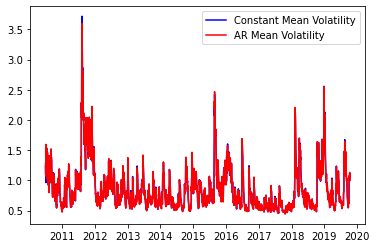

nan


In [30]:
cmean=arch_model(sp_price['Return'], p = 1, q = 1,mean = 'constant', vol = 'GARCH')
cmean_result=cmean.fit()
# Print model summary of GARCH with constant mean
print(cmean_result.summary())
# Print model summary of GARCH with AR mean
armean=arch_model(sp_price['Return'], p = 1, q = 1, mean = 'AR', lags = 1, vol = 'GARCH')
armean_result=armean.fit()
print(armean_result.summary())

# Get model estimated volatility
cmean_vol = cmean_result.conditional_volatility
armean_vol=armean_result.conditional_volatility

# Plot model volatility 
plt.plot(cmean_vol, color = 'blue', label = 'Constant Mean Volatility')
plt.plot(armean_vol, color = 'red', label = 'AR Mean Volatility')
plt.legend(loc = 'upper right')
plt.show()

# Check correlation of volatility estimations
print(np.corrcoef(cmean_vol, armean_vol)[0,1])

# Volatility models for asymmetric shocks

In [ ]:
bitcoin_data=pd.read_csv("bitcoin.csv")
bitcoin_data['Date'] = pd.to_datetime(bitcoin_data['Date'], format='%Y-%m-%d')
bitcoin_data.set_index(['Date'], inplace = True)

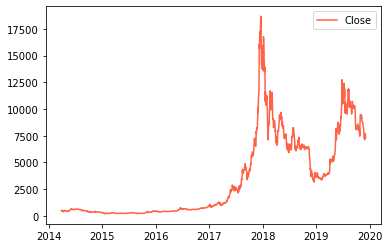

In [33]:
# plot the data
plt.plot(bitcoin_data['Close'], color = 'tomato', label = 'Close')
plt.legend(loc='upper right')
plt.show()

In [31]:
# Specify model assumptions
gjr_gm = arch_model(bitcoin_data['Return'], p = 1, q = 1, o = 1, vol = 'GARCH', dist = 't')

# Fit the model
gjrgm_result = gjr_gm.fit(disp = 'off')

# Print model fitting summary
print(gjrgm_result.summary())

                      Constant Mean - GJR-GARCH Model Results                       
Dep. Variable:                       Return   R-squared:                      -0.001
Mean Model:                   Constant Mean   Adj. R-squared:                 -0.001
Vol Model:                        GJR-GARCH   Log-Likelihood:               -3966.26
Distribution:      Standardized Student's t   AIC:                           7944.52
Method:                  Maximum Likelihood   BIC:                           7976.33
                                              No. Observations:                 1483
Date:                      Sun, Sep 06 2020   Df Residuals:                     1477
Time:                              22:43:10   Df Model:                            6
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu        

In [32]:
# Specify model assumptions
egarch_gm = arch_model(bitcoin_data['Return'], p = 1, q = 1, o = 1, vol = 'EGARCH', dist = 't')

# Fit the model
egarch_result = egarch_gm.fit(disp = 'off')

# Print model fitting summary
print(egarch_result.summary())

                        Constant Mean - EGARCH Model Results                        
Dep. Variable:                       Return   R-squared:                      -0.001
Mean Model:                   Constant Mean   Adj. R-squared:                 -0.001
Vol Model:                           EGARCH   Log-Likelihood:               -3954.19
Distribution:      Standardized Student's t   AIC:                           7920.38
Method:                  Maximum Likelihood   BIC:                           7952.19
                                              No. Observations:                 1483
Date:                      Sun, Sep 06 2020   Df Residuals:                     1477
Time:                              22:44:00   Df Model:                            6
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu        

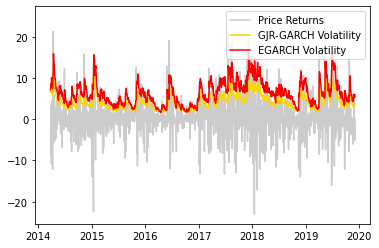

In [35]:
# Get model estimated volatility
gjrgm_vol= gjrgm_result.conditional_volatility
egarch_vol=egarch_result.conditional_volatility


# Plot the actual Bitcoin returns
plt.plot(bitcoin_data['Return'], color = 'grey', alpha = 0.4, label = 'Price Returns')

# Plot GJR-GARCH estimated volatility
plt.plot(gjrgm_vol, color = 'gold', label = 'GJR-GARCH Volatility')

# Plot EGARCH  estimated volatility
plt.plot(egarch_vol, color = 'red', label = 'EGARCH Volatility')

plt.legend(loc = 'upper right')
plt.show()

# GARCH rolling window forecast

In [79]:

start_loc = 0
end_loc = np.where(sp_price.index >= '2019-1-1')[0].min()
forecasts = {}
for i in range(30):
    #sys.stdout.write('.')
    #sys.stdout.flush()
    res = basic_gm.fit(first_obs=i, last_obs=i + end_loc, disp='off')
    temp = res.forecast(horizon=1).variance
    fcast = temp.iloc[i + end_loc - 1]
    forecasts[fcast.name] = fcast    
    # Save all forecast to a DataFrame
    forecast_var = pd.DataFrame(forecasts).T
print()
print(pd.DataFrame(forecasts).T)


                 h.1
2018-12-31  3.479932
2019-01-02  2.807865
2019-01-03  3.319815
2019-01-04  4.518389
2019-01-07  3.697270
2019-01-08  3.106054
2019-01-09  2.519967
2019-01-10  2.051311
2019-01-11  1.662720
2019-01-14  1.396800
2019-01-15  1.295754
2019-01-16  1.055450
2019-01-17  0.943908
2019-01-18  1.043434
2019-01-22  1.234965
2019-01-23  1.013316
2019-01-24  0.835537
2019-01-25  0.796152
2019-01-28  0.788610
2019-01-29  0.665677
2019-01-30  0.931665
2019-01-31  0.874201
2019-02-01  0.725743
2019-02-04  0.669828
2019-02-05  0.590354
2019-02-06  0.515589
2019-02-07  0.617200
2019-02-08  0.521530
2019-02-11  0.446254
2019-02-12  0.643815


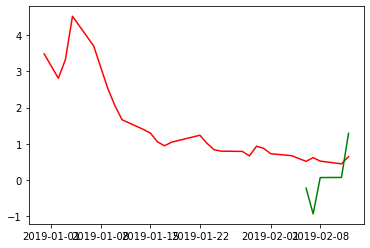

In [80]:
# Plot the forecast variance
plt.plot(forecast_var, color = 'red')
plt.plot(sp_price.Return['2019-02-06':'2019-02-12'], color = 'green')
plt.show()

# Model parameters

In [49]:
# Print model fitting summary
print(gm_result.summary())

# Get parameter stats from model summary
para_summary = pd.DataFrame({'parameter':gm_result.params,
                             'p-value': gm_result.pvalues})

# Print out parameter stats
print(para_summary)

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                 Return   R-squared:                      -0.000
Mean Model:             Constant Mean   Adj. R-squared:                 -0.000
Vol Model:                      GARCH   Log-Likelihood:               -41.5023
Distribution:                  Normal   AIC:                           91.0047
Method:            Maximum Likelihood   BIC:                           96.4739
                                        No. Observations:                   29
Date:                Sun, Sep 06 2020   Df Residuals:                       25
Time:                        23:11:00   Df Model:                            4
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.1454      0.198      0.735      0.462 [ -0.242,  0.53

In [50]:
# Get parameter stats from model summary
para_summary = pd.DataFrame({'parameter':gm_result.params,
                             'std-err': gm_result.std_err, 
                             't-value': gm_result.tvalues})

# Verify t-value by manual calculation
calculated_t = para_summary['parameter']/para_summary['std-err']

# Print calculated t-statistic
print(calculated_t)

# Print parameter stats
print(para_summary)

mu          0.734900
omega       2.078289
alpha[1]    0.079730
beta[1]     2.777324
dtype: float64
          parameter   std-err   t-value
mu         0.145374  0.197815  0.734900
omega      0.316013  0.152054  2.078289
alpha[1]   0.011056  0.138668  0.079730
beta[1]    0.690611  0.248661  2.777324


                 h.1
Date                
2019-10-08  0.111908
2019-10-09  0.111908
2019-10-10  0.111908
                 h.1
Date                
2019-10-08  1.075015
2019-10-09  1.065259
2019-10-10  1.054857
                 h.1
Date                
2019-10-08  1.075015
2019-10-09  1.065259
2019-10-10  1.054857


### ACF plot

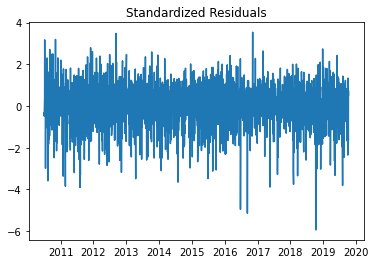

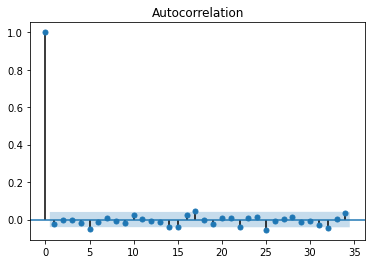

In [52]:
# Import the Python module
from statsmodels.graphics.tsaplots import plot_acf

# Plot the standardized residuals
plt.plot(gm_std_resid)
plt.title('Standardized Residuals')
plt.show()

# Generate ACF plot of the standardized residuals
plot_acf(gm_std_resid, alpha = 0.05)
plt.show()

### Ljung-Box test

In [53]:
# Import the Python module
from statsmodels.stats.diagnostic import acorr_ljungbox

# Perform the Ljung-Box test
lb_test = acorr_ljungbox(gm_std_resid, lags = 10)

# Print the p-values
print('P-values are: ', lb_test[1])

P-values are:  [0.2342134  0.49214004 0.6897556  0.72130332 0.16750727 0.22682466
 0.30561812 0.39677197 0.40506685 0.39076507]


C:\Users\chunx\AppData\Roaming\Python\Python37\site-packages\statsmodels\stats\diagnostic.py:524: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


In [55]:
# Print normal GARCH model summary
print(gm_result.summary())
# Print skewed GARCH model summary
print(skewt_result.summary())

# Print the log-likelihodd of normal GARCH
print('Log-likelihood of normal GARCH :', gm_result.loglikelihood)
# Print the log-likelihodd of skewt GARCH
print('Log-likelihood of skewt GARCH :', skewt_result.loglikelihood)

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                 Return   R-squared:                      -0.000
Mean Model:             Constant Mean   Adj. R-squared:                 -0.000
Vol Model:                      GARCH   Log-Likelihood:               -41.5023
Distribution:                  Normal   AIC:                           91.0047
Method:            Maximum Likelihood   BIC:                           96.4739
                                        No. Observations:                   29
Date:                Sun, Sep 06 2020   Df Residuals:                       25
Time:                        23:11:00   Df Model:                            4
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.1454      0.198      0.735      0.462 [ -0.242,  0.53

### AIC and BIC

In [56]:
# Print the AIC GJR-GARCH
print('AIC of GJR-GARCH model :', gjrgm_result.aic)
# Print the AIC of EGARCH
print('AIC of EGARCH model :', egarch_result.aic)

# Print the BIC GJR-GARCH
print('BIC of GJR-GARCH model :', gjrgm_result.bic)
# Print the BIC of EGARCH
print('BIC of EGARCH model :', egarch_result.bic)

AIC of GJR-GARCH model : 7944.515182772993
AIC of EGARCH model : 7920.376255850545
BIC of GJR-GARCH model : 7976.3261168258205
BIC of EGARCH model : 7952.187189903372


### MAE, MSE

In [86]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
def evaluate(observation, forecast): 
    # Call sklearn function to calculate MAE
    mae = mean_absolute_error(observation, forecast)
    print('Mean Absolute Error (MAE): {:.3g}'.format(mae))
    # Call sklearn function to calculate MSE
    mse = mean_squared_error(observation, forecast)
    print('Mean Squared Error (MSE): {:.3g}'.format(mse))
    return mae, mse



In [84]:
forecast_var['return']=sp_price['Return']
# Backtest model with MAE, MSE
evaluate(forecast_var['return'], forecast_var['h.1'])

Mean Absolute Error (MAE): 1.26
Mean Squared Error (MSE): 3.09


(1.2632027939738566, 3.0864999679655085)